-10.0 dB noise convergence error(Highstart:  3.006890077081629 %
-10.0 dB noise convergence error(Lowstart:  2.3068467639307277 %
1.0 dB noise convergence error(Highstart:  1.022343487790898 %
1.0 dB noise convergence error(Lowstart:  0.7690257754739277 %
10.0 dB noise convergence error(Highstart:  0.2220248586906288 %
10.0 dB noise convergence error(Lowstart:  0.06768470927328338 %
20.0 dB noise convergence error(Highstart:  0.09991436765753813 %
20.0 dB noise convergence error(Lowstart:  0.07634941270209192 %
19
19
19
19


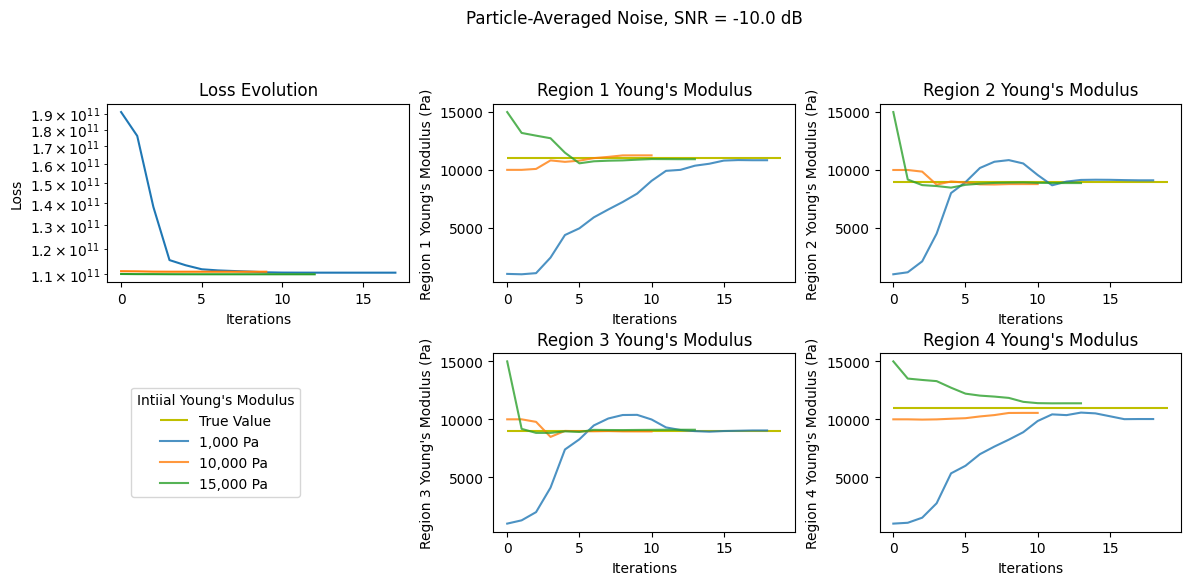

20
20
20
20


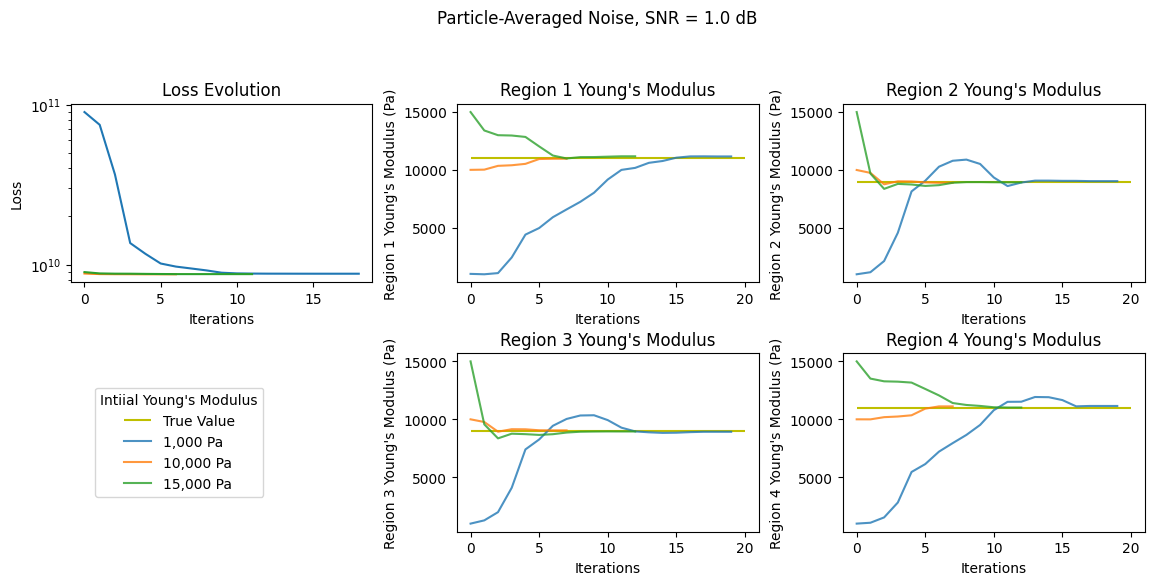

20
20
20
20


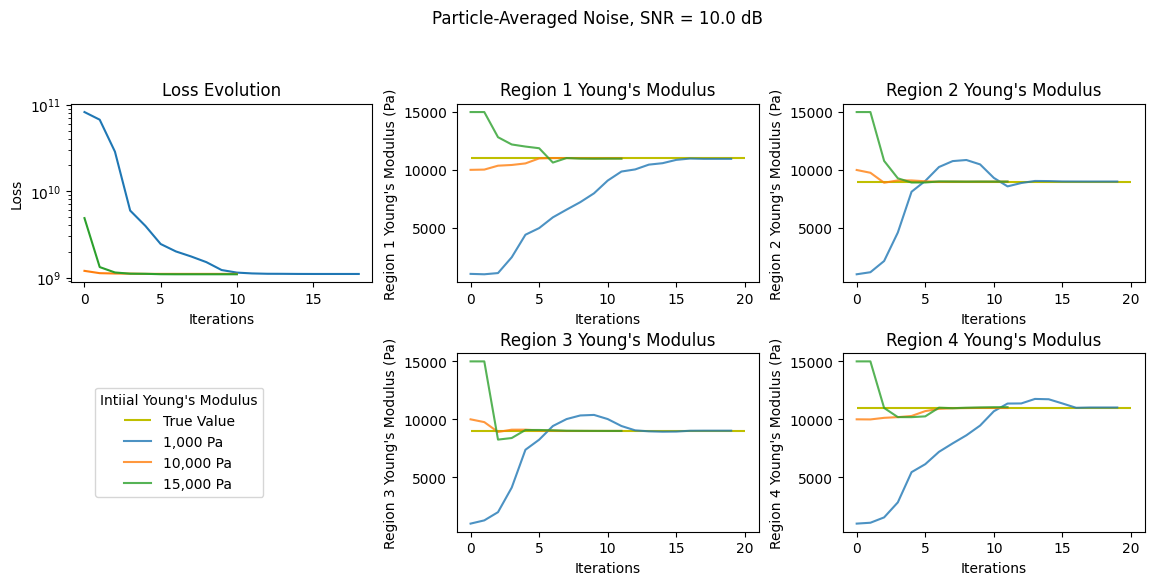

23
23
23
23


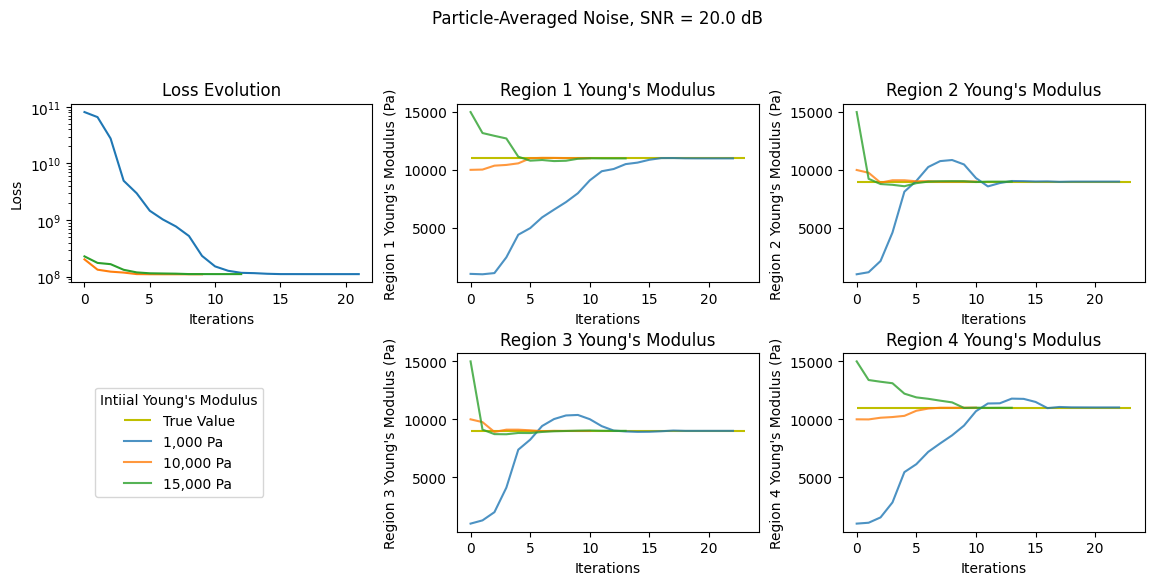

In [9]:
import matplotlib.pyplot as plt
import json
import numpy as np

snrs = [
    '-10',
    '1',
    '10',
    '20'
    ]

for snr in snrs:
    snr_num = float(snr) 

    filenames = [
        'result_db_' + snr + '_init_1e3.json',
        'result_db_' + snr + '_init_1e4.json',
        'result_db_' + snr + '_init_15e4.json',
    ]
    results = []
    for name in filenames:

        with open(name) as json_file:
            result = json.load(json_file)
            results.append(result)
    Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
    keys = ["E1", "E2", "E3", "E4"]
    inits = ["High", "Low"]
    
    for j, init in enumerate(inits):
        avg_err = 0
        result = results[j]

        for i, key in enumerate(keys):
            avg_err += np.abs(result[key][-1] - Es[i]) / Es[i]
        
        avg_err = avg_err / 4

        print(str(snr_num) + " dB noise convergence error" + "(" + init + "start: ", avg_err*100, '%')

for snr in snrs:

    snr_num = float(snr)

    filenames = [
        'result_db_' + snr + '_init_1e3.json',
        'result_db_' + snr + '_init_1e4.json',
        'result_db_' + snr + '_init_15e4.json',
    ]
    results = []
    for name in filenames:

        with open(name) as json_file:
            result = json.load(json_file)
            results.append(result)




    fig, axs = plt.subplots(2,3, figsize=(12, 6))
    plt.suptitle('Particle-Averaged Noise, SNR = ' + str(snr_num) + ' dB')
    plt.tight_layout(pad=3)


    keys = ["E1", "E2", "E3", "E4"]
    Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
    scale = [1, 1, 1, 1, 1, 1]
    labels = ['1,000 Pa',
            '10,000 Pa', 
            '15,000 Pa',
            '1e3',
            '2e4',
            '8 particles, $\epsilon_{xx}$']
    colors = []

    max_its = max([len(results[i][keys[0]]) for i in range(3)])

    axs[0, 0].set_title("Loss Evolution")
    axs[0, 0].set_ylabel("Loss")
    axs[0, 0].set_yscale('log')
    axs[0, 0].set_xlabel("Iterations")
    for j, result in enumerate(results):
        axs[0, 0].plot(np.array(result["losses"]) * scale[j], label=labels[j])
    
    axs[0, 0].set_yscale('log')
    axs[1, 0].axis("off")

    regions = ['Region 1 Young\'s Modulus',
            'Region 2 Young\'s Modulus',
                'Region 3 Young\'s Modulus', 
                'Region 4 Young\'s Modulus']
    mapping = {
        0: [0, 1],
        1: [0, 2],
        2: [1, 1],
        3: [1, 2]
    }
    for i, key in enumerate(keys):
        index = mapping[i]
        print(max_its)
        
        axs[index[0], index[1]].set_title(regions[i])
        axs[index[0], index[1]].set_ylabel(regions[i] + " (Pa)")
        axs[index[0], index[1]].set_xlabel("Iterations")
        axs[index[0], index[1]].hlines(Es[i], 0, max_its, color='y', label='True Value')
        for j, result in enumerate(results):
            axs[index[0], index[1]].plot(result[key], alpha=0.8, label=labels[j])
    axs[0, 1].legend(loc=(-1.2, -1.2), title='Intiial Young\'s Modulus')
    plt.show()


20.0 dB noise convergence error(Middlestart:  0.09991436765753813 %
20.0 dB noise convergence error(Highstart:  0.07634941270209192 %
20.0 dB noise convergence error(Lowstart:  0.05644703335274932 %
10.0 dB noise convergence error(Middlestart:  0.2220248586906288 %
10.0 dB noise convergence error(Highstart:  0.06768470927328338 %
10.0 dB noise convergence error(Lowstart:  0.19136392318935513 %
1.0 dB noise convergence error(Middlestart:  1.022343487790898 %
1.0 dB noise convergence error(Highstart:  0.7690257754739277 %
1.0 dB noise convergence error(Lowstart:  0.749847838856029 %
-10.0 dB noise convergence error(Middlestart:  3.006890077081629 %
-10.0 dB noise convergence error(Highstart:  2.3068467639307277 %
-10.0 dB noise convergence error(Lowstart:  1.6826236501518606 %


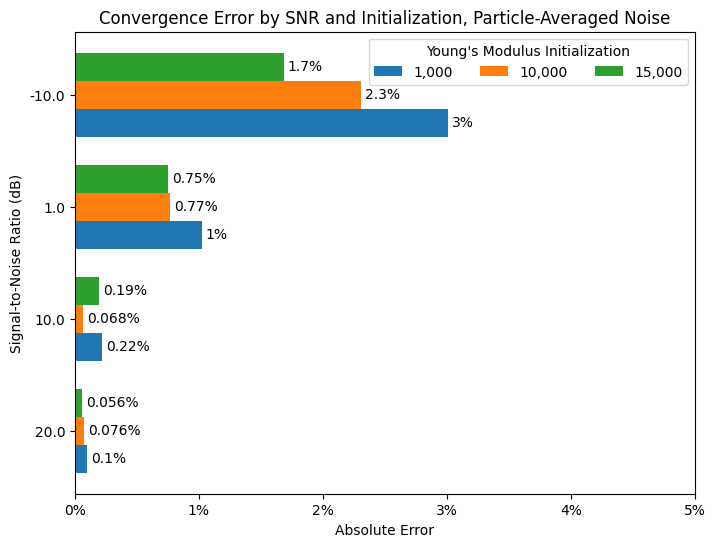

array([[0.00099914, 0.00222025, 0.01022343, 0.0300689 ],
       [0.00076349, 0.00067685, 0.00769026, 0.02306847],
       [0.00056447, 0.00191364, 0.00749848, 0.01682624]])

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

snrs = [
    '20',
    '10',
    '0',
    '-10',
    ]
snr_strs = [str(float(snr)) for snr in snrs]
initializations = ['1,000', '10,000', '15,000']
errs = []

for snr in snrs:
    snr_num = float(snr)
    
    filenames = [
        'result_db_' + snr + '_init_1e3.json',
        'result_db_' + snr + '_init_1e4.json',
        'result_db_' + snr + '_init_15e4.json',
    ]
    results = []
    for name in filenames:

        with open(name) as json_file:
            result = json.load(json_file)
            results.append(result)
    Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
    keys = ["E1", "E2", "E3", "E4"]
    inits = ["Middle", "High", "Low"]
    
    err = []

    for j, init in enumerate(inits):
        avg_err = 0
        result = results[j]

        for i, key in enumerate(keys):
            avg_err += np.abs(result[key][-1] - Es[i]) / Es[i]
        
        avg_err = avg_err / 4
        err.append(avg_err)
        print(str(snr_num) + " dB noise convergence error" + "(" + init + "start: ", avg_err*100, '%')

    errs.append(err)

errs = np.array(errs).transpose()
species = snr_strs
penguin_means = {
    '1,000': errs[0],
    '10,000': errs[1],
    '15,000': errs[2],
}

x = np.arange(len(snr_strs))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(8,6))
fmt = '%.2g%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement*100, width, label=attribute)
    ax.bar_label(rects, padding=3, fmt='%.2g%%')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Absolute Error')
ax.set_title('Convergence Error by SNR and Initialization, Particle-Averaged Noise')
ax.set_yticks(x + width, species)
ax.set_ylabel('Signal-to-Noise Ratio (dB)')
ax.legend(ncols=3, title='Young\'s Modulus Initialization')
ax.set_xlim(0, 5)

plt.show()
errs

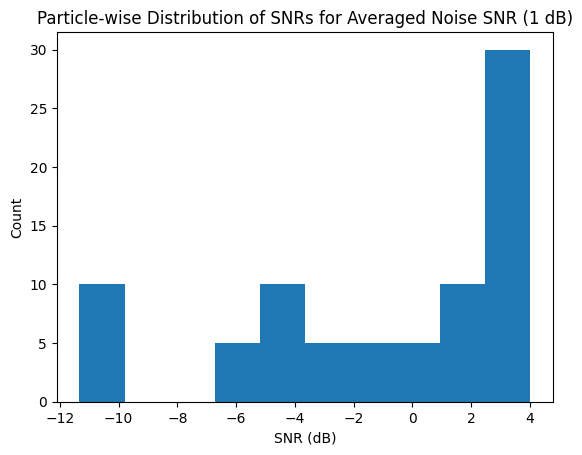

In [52]:
import numpy as np
import matplotlib.pyplot as plt

Nx = 80
target_strain_np = np.load("strain2_true.npy")
steps = 1024

SNR_dB = 1
SNR_linear = 10 ** (SNR_dB / 10)
# get avg signal power in eps_xx
P_signal = np.mean(target_strain_np[:,:Nx,0,0]**2)
P_noise = P_signal / SNR_linear
# particle-wise noise
noise = np.random.normal(0, P_noise ** 0.5, (steps, Nx))
# target_strain_np[:, :Nx, 0, 0] += noise
P_signal

P_signal_ch = np.mean(target_strain_np[:,:Nx, 0, 0]**2, axis=0)
SNR_ch = 10 * np.log10(P_signal_ch / P_noise)
SNR_ch

plt.figure()
plt.hist(SNR_ch)
plt.xlabel('SNR (dB)')
plt.ylabel('Count')
plt.title('Particle-wise Distribution of SNRs for Averaged Noise SNR (1 dB)')
plt.show()
